## Importing libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the dataset

In [49]:
df = pd.read_excel('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/ts_data.xlsx')
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


## Shape of the dataset

In [50]:
df.shape

(10000, 2)

## Missing vcalues checking

In [51]:
df.isnull().sum()

Time     0
Value    0
dtype: int64

## PLot the time series data

<AxesSubplot:>

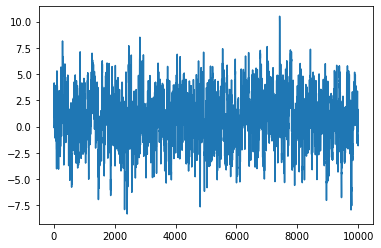

In [52]:
df['Value'].plot()

## Dickey fukker test to see whether the dataset is stationary or not
As the P-value is less than 0.005, the dataset is stationary!

In [53]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(Value):
    result = adfuller(Value)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(df['Value'])

ADF test statistics : -22.184930227348676
P-value : 0.0
#Lags used : 0
Number of observation used : 9999
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


## Plotting PACF

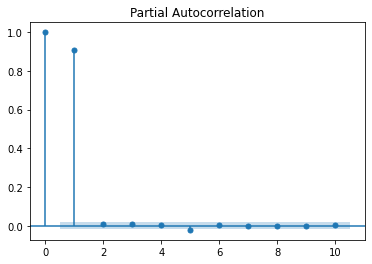

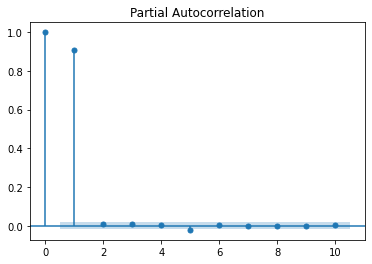

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Value'], lags=10)

## Choose lagged value as one

In [55]:
df['Value_shifted_1'] = df['Value'].shift(1)
df.head(3)

,Time,Value,Value_shifted_1
0,1,0.000000,NaN
1,2,-0.090263,0.000000
2,3,0.749995,-0.090263


## Making the dataset concise

In [56]:
df.drop('Time', axis = 1, inplace = True)
df.head(3)

,Value,Value_shifted_1
0,0.000000,NaN
1,-0.090263,0.000000
2,0.749995,-0.090263


In [57]:
df.dropna(inplace = True)
df.head(3)

,Value,Value_shifted_1
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995


## Splitting into X and y

In [68]:
X = df.Value_shifted_1.values
y = df.Value.values

## Reshaping X and y

In [69]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

## Train test splitting

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

## Model Build UP

In [71]:
lr1 = LinearRegression()
model = lr1.fit(X_train, y_train)

## Prediction

In [117]:
y1_pred = lr1.predict(X_test)

## Plotting the actual and predicted values
For making the plot readable, I only took last 10 values.

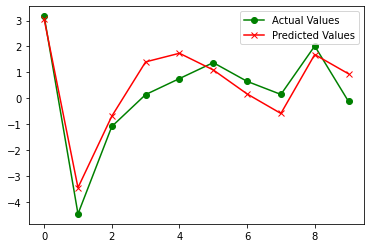

In [121]:
plt.plot(y_test[-10:], label="Actual Values", color = 'Green', marker = 'o')
plt.plot(y1_pred[-10:], label="Predicted Values", color = 'Red', marker = 'x')
plt.legend()
plt.show()

In [123]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y1_pred).round(4))

0.8191
